# Machine Learning Foundations


## Outline

1. Introduction
  - When to use ML
  - Types of ML
2. Features: selection and engineering
3. Scenario:  predicting the stock market with regression
  - Decision trees
4. Scenario:  image processing, featurization and classification
  - Histogram of Oriented Gradients
  - Support Vector Machine classifier
  - Optimization algorithm
6. Classical ML vs. deep learning

## Datasets

- [MSFT Stock market data](https://www.kaggle.com/darkknight91/microsoft-stock-price-daily-19982018)
- Climbing gear inventory image data


## Imports

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from utils import pad_image

# Plot inline in notebook
%matplotlib inline

# Make figures wider to see easier
plt.rcParams["figure.figsize"] = (16,3)
# Change axis area color to make it easier to see image area
plt.rcParams['figure.facecolor'] = 'yellow'

## Scenario:  predicting the stock market with regression

In [38]:
data = pd.read_csv('data/daily_MSFT.csv', header=0)
data.head(10)

,timestamp,open,high,low,close,volume
0,2019-01-02,99.55,101.75,98.94,101.12,35329345
1,2018-12-31,101.29,102.40,100.44,101.57,33173765
2,2018-12-28,102.09,102.41,99.52,100.39,38169312
3,2018-12-27,99.30,101.19,96.40,101.18,49498509
4,2018-12-26,95.14,100.69,93.96,100.56,51634793
5,2018-12-24,97.68,97.97,93.98,94.13,43935192
6,2018-12-21,101.63,103.00,97.46,98.23,111242070
7,2018-12-20,103.05,104.31,98.78,101.51,70334184
8,2018-12-19,103.65,106.88,101.35,103.69,68198186
9,2018-12-18,103.75,104.51,102.52,103.97,49319196


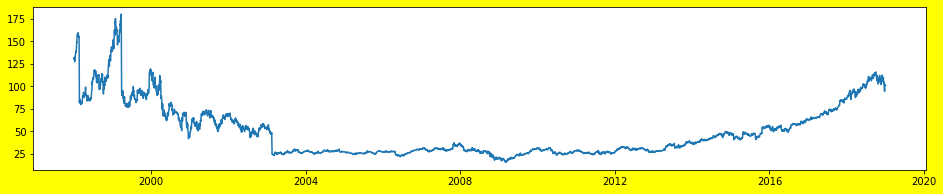

In [39]:
dates = pd.to_datetime(data['timestamp'])
dates
plt.plot(dates, data['close'])

## Scenario:  image processing, featurization and classification

### Image manipulation and processing

In [40]:
def plot_rgb(img):
    """Plot the distribution of RGB intensities
    
    Arguments
    ---------
    img : 3D numpy array with values [0.0-1.0]
       input image
    """
    plt.hist(img[...,0].ravel(), color='red', bins=50, alpha=0.7)
    plt.hist(img[...,1].ravel(), color='green', bins=50, alpha=0.7)
    plt.hist(img[...,2].ravel(), color='blue', bins=50, alpha=0.7)

Read image with `matplotlib`

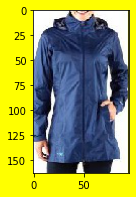

In [41]:
img = plt.imread('data/jacket.jpeg')
plt.imshow(img)

In [42]:
# Check the shape of the image (height, width, num channels)
img.shape

(163, 96, 3)

Use the utility function to square pad the image (ML algorithm will want square images all of the same size).

In [43]:
img_padded = pad_image(img)

In [44]:
# Check the shape again
img_padded.shape


(163, 163, 3)

Plot the padded image

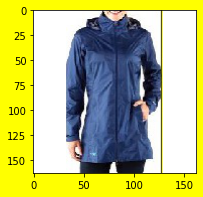

In [45]:
# Convert the 0-255 valued numpy array to unsigned int8 for plotting correctly
img_padded = img_padded.astype(np.uint8)
plt.imshow(img_padded)

Let's see what the distribution of RGB (separated) intensities is for the image using our `plot_rgb` function from above.

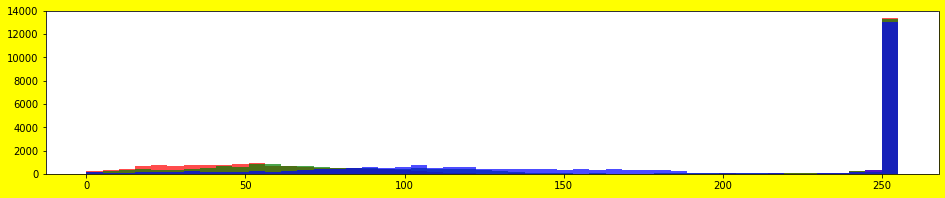

In [46]:
plot_rgb(img_padded)

What if we remove the most intense values (white) to reveal other RGB values?

In [47]:
# Copy image and normalize 0-1 rather than 1-255 so that we can use np.nan values
img2 = img_padded.copy()/255.
img2[img2 == 1.0] = np.nan

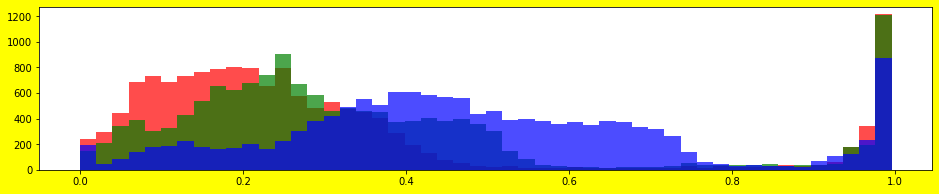

In [48]:
plot_rgb(img2)

What if we remove the green channel (this is channel `1` in the third dimension).

In [49]:
# Let's normalize to 0-1 instead of 1-255
img3 = img_padded.copy()/255.
img3[...,1][img3[...,1] < 1] = 0

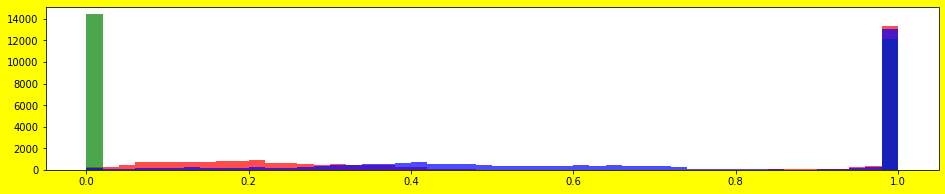

In [50]:
plot_rgb(img3)

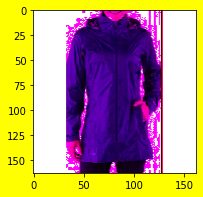

In [51]:
# Plot again without green
plt.imshow(img3)